<a href="https://colab.research.google.com/github/Kufzuk2/Comp_math/blob/main/sem2_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [42]:
def adams_methods(f, x0, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: [(x0, y0) for _ in range(len(t_values))] for order in orders}
    n = len(t_values)

    for order in orders:
        solutions[order][0] = (x0, y0)
        for i in range(1, order):
            t = t_values[i-1]
            x_prev, y_prev = solutions[order][i-1]

            k1_x, k1_y = f(x_prev, y_prev)
            k2_x, k2_y = f(x_prev + h * k1_x / 2, y_prev + h * k1_y / 2)
            k3_x, k3_y = f(x_prev + h * k2_x / 2, y_prev + h * k2_y / 2)
            k4_x, k4_y = f(x_prev + h * k3_x, y_prev + h * k3_y)

            x_new = x_prev + h * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
            y_new = y_prev + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
            solutions[order][i] = (x_new, y_new)


        for i in range(order, n):
            t_prev = t_values[i-1]
            x_prev, y_prev = solutions[order][i-1]

            if order == 2:
                f_prev_x, f_prev_y = f(*solutions[order][i-1])
                f_prev_prev_x, f_prev_prev_y = f(*solutions[order][i-2])


                x_new = x_prev + h * (3*f_prev_x - f_prev_prev_x) / 2
                y_new = y_prev + h * (3*f_prev_y - f_prev_prev_y) / 2
                solutions[order][i] = (x_new, y_new)

            elif order == 3:
                f_prev_x, f_prev_y = f(*solutions[order][i-1])
                f_prev_prev_x, f_prev_prev_y = f(*solutions[order][i-2])
                f_prev_prev_prev_x, f_prev_prev_prev_y = f(*solutions[order][i-3])


                x_new = x_prev + h * (23*f_prev_x - 16*f_prev_prev_x + 5*f_prev_prev_prev_x) / 12
                y_new = y_prev + h * (23*f_prev_y - 16*f_prev_prev_y + 5*f_prev_prev_prev_y) / 12
                solutions[order][i] = (x_new, y_new)

            elif order == 4:
                f_prev_x, f_prev_y = f(*solutions[order][i-1])
                f_prev_prev_x, f_prev_prev_y = f(*solutions[order][i-2])
                f_prev_prev_prev_x, f_prev_prev_prev_y = f(*solutions[order][i-3])
                f_prev_prev_prev_prev_x, f_prev_prev_prev_prev_y = f(*solutions[order][i-4])


                x_new = x_prev + h * (55*f_prev_x - 59*f_prev_prev_x + 37*f_prev_prev_prev_x - 9*f_prev_prev_prev_prev_x) / 24
                y_new = y_prev + h * (55*f_prev_y - 59*f_prev_prev_y + 37*f_prev_prev_prev_y - 9*f_prev_prev_prev_prev_y) / 24
                solutions[order][i] = (x_new, y_new)

    return t_values, solutions

In [43]:
def backward_differentiation_methods(f, x0, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: [(x0, y0)] * len(t_values) for order in orders}  # Теперь список кортежей
    n = len(t_values)

    for order in orders:
        solutions[order][0] = (x0, y0)


        for i in range(1, order):
            t = t_values[i-1]
            x_prev, y_prev = solutions[order][i-1]

            k1_x, k1_y = f(x_prev, y_prev)
            k2_x, k2_y = f(x_prev + h*k1_x/2, y_prev + h*k1_y/2)
            k3_x, k3_y = f(x_prev + h*k2_x/2, y_prev + h*k2_y/2)
            k4_x, k4_y = f(x_prev + h*k3_x, y_prev + h*k3_y)

            x_new = x_prev + h*(k1_x + 2*k2_x + 2*k3_x + k4_x)/6
            y_new = y_prev + h*(k1_y + 2*k2_y + 2*k3_y + k4_y)/6
            solutions[order][i] = (x_new, y_new)


        for i in range(order, n):
            t = t_values[i]
            if order == 2:

                x_prev1, y_prev1 = solutions[order][i-1]
                x_prev2, y_prev2 = solutions[order][i-2]


                x_pred = (4*x_prev1 - x_prev2) / 3
                y_pred = (4*y_prev1 - y_prev2) / 3


                for _ in range(3):
                    fx, fy = f(x_pred, y_pred)
                    x_pred = (4*x_prev1 - x_prev2 + 2*h*fx) / 3
                    y_pred = (4*y_prev1 - y_prev2 + 2*h*fy) / 3

                solutions[order][i] = (x_pred, y_pred)

            elif order == 3:
                x_prev1, y_prev1 = solutions[order][i-1]
                x_prev2, y_prev2 = solutions[order][i-2]
                x_prev3, y_prev3 = solutions[order][i-3]

                x_pred = (18*x_prev1 - 9*x_prev2 + 2*x_prev3) / 11
                y_pred = (18*y_prev1 - 9*y_prev2 + 2*y_prev3) / 11

                for _ in range(3):
                    fx, fy = f(x_pred, y_pred)
                    x_pred = (18*x_prev1 - 9*x_prev2 + 2*x_prev3 + 6*h*fx) / 11
                    y_pred = (18*y_prev1 - 9*y_prev2 + 2*y_prev3 + 6*h*fy) / 11

                solutions[order][i] = (x_pred, y_pred)

            elif order == 4:
                x_prev1, y_prev1 = solutions[order][i-1]
                x_prev2, y_prev2 = solutions[order][i-2]
                x_prev3, y_prev3 = solutions[order][i-3]
                x_prev4, y_prev4 = solutions[order][i-4]

                x_pred = (48*x_prev1 - 36*x_prev2 + 16*x_prev3 - 3*x_prev4) / 25
                y_pred = (48*y_prev1 - 36*y_prev2 + 16*y_prev3 - 3*y_prev4) / 25

                for _ in range(3):
                    fx, fy = f(x_pred, y_pred)
                    x_pred = (48*x_prev1 - 36*x_prev2 + 16*x_prev3 - 3*x_prev4 + 12*h*fx) / 25
                    y_pred = (48*y_prev1 - 36*y_prev2 + 16*y_prev3 - 3*y_prev4 + 12*h*fy) / 25

                solutions[order][i] = (x_pred, y_pred)

    return t_values, solutions

In [44]:
def runge_kutta_methods(f, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: ([(0, 0) for _ in range(0, len(t_values))])for order in orders}


    for order in orders:
        solutions[order][0] = x0, y0
        for i in range(1, len(t_values)):
            t = t_values[i-1]
            x, y = solutions[order][i-1]
            # x =

            if order == 1:
                k1_x, k1_y = f(x, y)
                solutions[order][i] = x + h * k1_x, y + h * k1_y

            elif order == 2:
                k1_x, k1_y = f(x, y)
                k2_x, k2_y = f(x + h * k1_x, y + h * k1_y)
                solutions[order][i] = x + h * (k1_x + k2_x) / 2, y + h * (k1_y + k2_y) / 2

            elif order == 3:
                k1_x, k1_y = f(x, y)
                k2_x, k2_y = f(x + h * k1_x/2, y + h*k1_y/2)
                k3_x, k3_y = f(x + -h*k1_x + 2*h*k2_x, y - h*k1_y + 2*h*k2_y)
                solutions[order][i] = x + h * (k1_x + 4*k2_x + k3_x) / 6, y + h * (k1_y + 4*k2_y + k3_y) / 6

            elif order == 4:
                k1_x, k1_y = f(x, y)
                k2_X, k2_y = f(x + h*k1_x/2, y + h*k1_y/2)
                k3_x, k3_y = f(x + h*k2_x/2, y + h*k2_y/2)
                k4_x, k4_y = f(x + h*k3_x, y + h*k3_y)
                solutions[order][i] = x + h * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6, y + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6

    return t_values, solutions

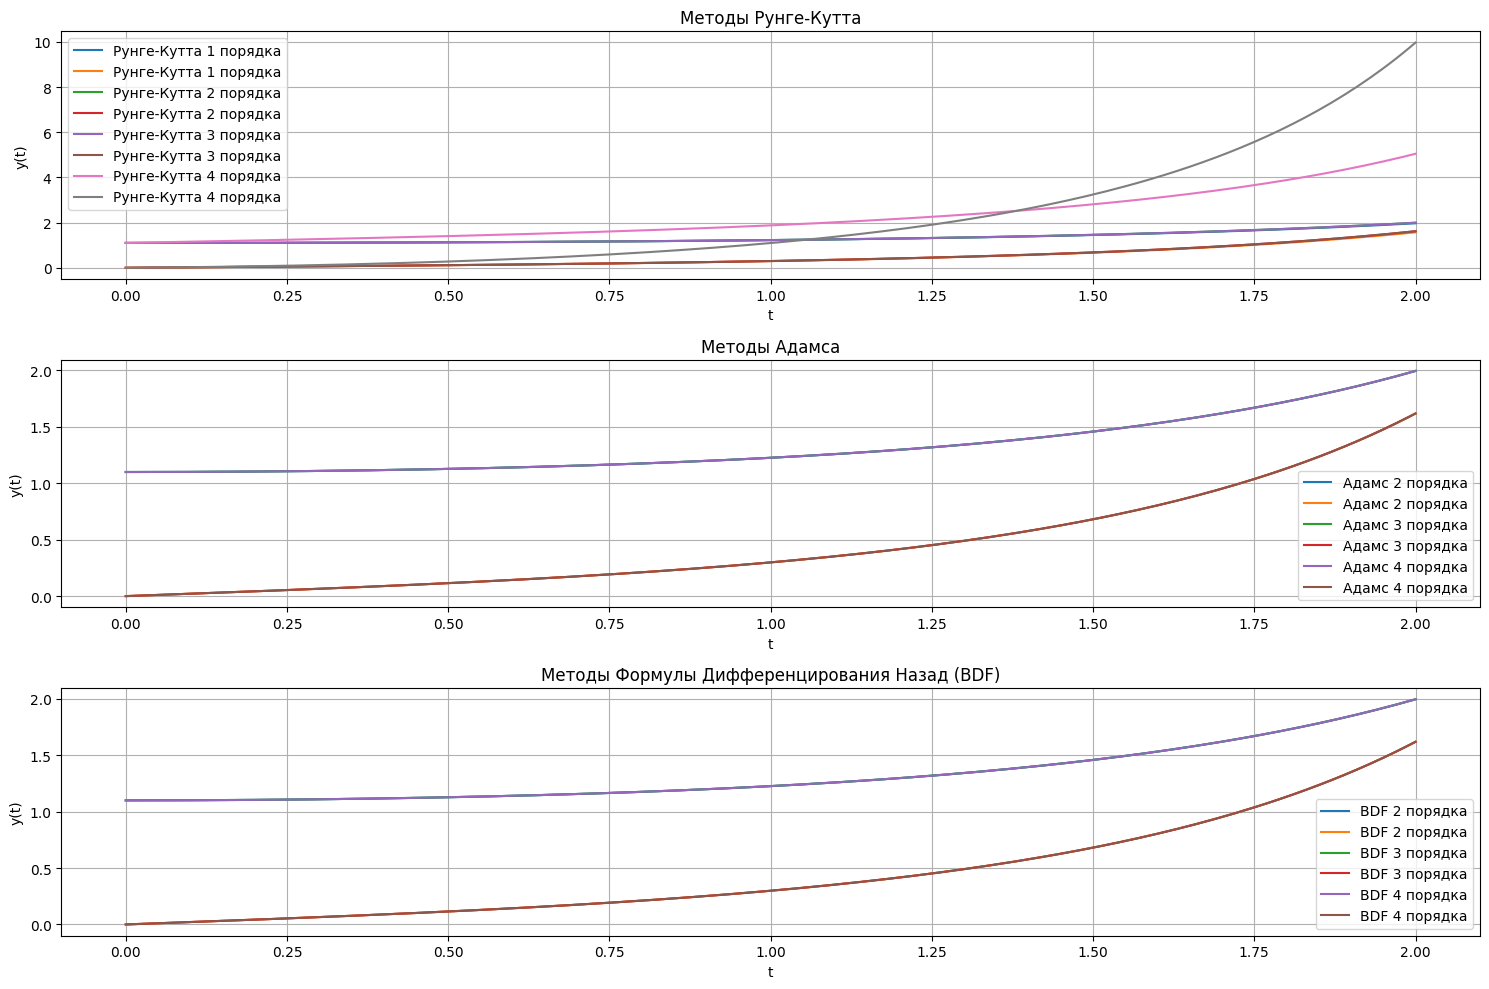

In [45]:
def f(x, y):
    return y, x * x - 1


y0 = 0.0
x0 = 1.1

tn = 2
t0 = 0
h = 0.01

t_rk, sol_rk = runge_kutta_methods(f, y0, t0, tn, h, orders=[1, 2, 3, 4])
t_adams, sol_adams = adams_methods(f, x0, y0, t0, tn, h, orders=[2, 3, 4])
t_bdf, sol_bdf = backward_differentiation_methods(f, x0, y0, t0, tn, h, orders=[2, 3, 4])

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
for order in [1, 2, 3, 4]:
    plt.plot(t_rk, sol_rk[order], label=f'Рунге-Кутта {order} порядка')
plt.title('Методы Рунге-Кутта')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
for order in [2, 3, 4]:
    plt.plot(t_adams, sol_adams[order], label=f'Адамс {order} порядка')
plt.title('Методы Адамса')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
for order in [2, 3, 4]:
    plt.plot(t_bdf, sol_bdf[order], label=f'BDF {order} порядка')
plt.title('Методы Формулы Дифференцирования Назад (BDF)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()